# Lung Cancer Detection Mode

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [50]:
conda install -c conda-forge xgboost

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda





Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Deepak\Desktop\ML-PROJECT\lung-cancer-detection\env

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          11 KB  conda-forge
    ca-certificates-2022.5.18.1|       h5b45459_0         180 KB  conda-forge
    certifi-2022.5.18.1        |   py39hcbf5309_0         151 KB  conda-forge
    libxgboost-1.5.1           |   cpu_h110a20b_2         2.3 MB  conda-forge
    openssl-1.1.1o             |       h8ffe710_0         5.7 MB  conda-forge
    py-xgboost-1.5.1           |cpu_py39ha538f94_2         151 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    xgboost-1.5.1              |cpu_py39ha538f94_2          13 KB  conda-forge
    -------------------------------------

In [4]:
# Importing Data
lung_cancer_df = pd.read_csv('data/survey lung cancer.csv',low_memory=False)

In [5]:
lung_cancer_df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [6]:
lung_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [21]:
lung_cancer_df.columns
lung_cancer_df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [26]:
lung_cancer_df['GENDER'].replace('M',0,inplace=True)
lung_cancer_df['GENDER'].replace('F',1,inplace=True)
lung_cancer_df['LUNG_CANCER'].replace('YES',1,inplace=True)
lung_cancer_df['LUNG_CANCER'].replace('NO',0,inplace=True)
lung_cancer_df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,0,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,0,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,0,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


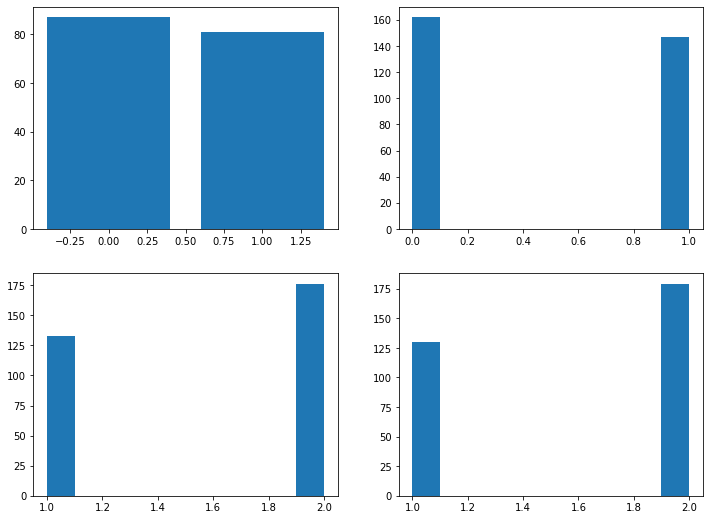

In [53]:
# Ploting Graphs from dataframe
fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,
                                          ncols=2,
                                          figsize=(12,9))
ax1.bar(lung_cancer_df['LUNG_CANCER'],lung_cancer_df['AGE'])
ax2.hist(lung_cancer_df['GENDER'])
ax3.hist(lung_cancer_df['YELLOW_FINGERS'])
ax4.hist(lung_cancer_df['COUGHING']);

In [10]:
lung_cancer_df['AGE'].median()


62.0

In [35]:
X = lung_cancer_df.drop(columns=['LUNG_CANCER'])
y = lung_cancer_df['LUNG_CANCER']

In [37]:
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
classifier.score(X_test,y_test)

0.8387096774193549

In [49]:
classifier.predict(X_test) == y_test

226     True
290     True
182     True
121     True
74      True
       ...  
55      True
22     False
251     True
190    False
35      True
Name: LUNG_CANCER, Length: 62, dtype: bool

In [55]:
classifier = svm.SVC()
classifier.fit(X_train,y_train)

SVC()

In [56]:
classifier.score(X_test,y_test)

0.8709677419354839

In [57]:
classifier.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)